# Optimisation sur Python
Lilian Boissé, Théo De Sa Morais et Jean Clark.
## Question 1 : Déterminer les points critiques de f et leurs natures.
On a la fonction suivante : $f(x,y)=(x-3)^2(x-1)^2-(y-1)^2$. Et le disque $D_R$ de centre de coordonnées (1,1), de rayon $R$ et donc d'équation $(x-1)^2+(y-1)^2=<R$

In [1]:
import sympy as sym##Importation des différents packages, on utilisera numpy, sympy et matplotlib
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rc('figure',figsize=(12,12))

In [2]:
x,y, z , a ,b,r, R=sym.symbols('x y z a b r R', real = True)##compréhension de symboles par python
lam = sym.symbols('lambda', real = True)
sym.init_printing()

In [3]:
f=(x-3)**2*(x-1)**2-(y-1)**2##On définit f

Première étape : on automatise le calcul de gradients, hessienne, points critiques et hessienne évaluée aux points critiques.

In [4]:
def Hessiennes(f):
    X=f.free_symbols
    liste_gradients=[]##liste du gradient initial
    liste_Hessiennes=[]##liste de la hessienne initiale
    ##Boucle sur la premiere variable##
    for var1 in X:
        liste_gradients.append(f.diff(var1))
        Hx=[]
        ##calcul de la hessienne##
        for var2 in X:
            Hx.append(f.diff(var1,var2))
        liste_Hessiennes.append(Hx)   
    H=sym.Matrix(liste_Hessiennes)
    Hessienne_evaluee_aux_pc=[]
    gradf=sym.Matrix(liste_gradients)
    Liste_pc=sym.solve(gradf,X,dict=True)##dict=True force un output en liste
    Hessienne_evaluee_aux_pc=[]
    for pc in Liste_pc:
        Hessienne_evaluee_aux_pc.append(H.subs(pc))
    
    return gradf,H, Liste_pc, Hessienne_evaluee_aux_pc



On retourne les résultats afin de les enregistrer. Nous allons maintenant calculer les mineurs et leurs déterminants afin de trouver la nature de ces points critiques.

In [5]:
def Mineurs(Hessiennes_aux_points_critiques):##calcul des mineurs
    Taille_de_la_matrice,p=Hessiennes_aux_points_critiques.shape ##saisie de la taille de la matrice hessienne évaluée au point critique
    mineurs=[]##liste vide permettant de remplir notre liste de mineurs
    for k in range(1,Taille_de_la_matrice+1):
        Hessiennes_aux_points_critiques_k=Hessiennes_aux_points_critiques[0:k,0:k]##boucle de calcul des déterminants des matrices (1+n)*(1+n)
        mineurs.append(sym.det(Hessiennes_aux_points_critiques_k))
    return mineurs##On retourne la valeur du déterminant des différents mineurs.

def Nature(Hessiennes_aux_points_critiques):##Fonction déterminant la nature des points critiques
    Taille_de_la_matrice,p=Hessiennes_aux_points_critiques.shape
    mineurs=np.array(Mineurs(Hessiennes_aux_points_critiques))##On définit notre liste des mineurs avec numpy afin de pouvoir utiliser 
    ##np.all pour les conditions.
    if (mineurs>0).all():
        texte="Le point critique est un minimum local"
        return texte
    elif ((mineurs*np.array([(-1)**k for k in range(1,1+Taille_de_la_matrice)]))>0).all():
        texte="Le point critique est un maximum local"
        return texte

    elif (mineurs!=0).all():
        texte="Le point critique est un point selle"
        return texte

    elif (mineurs[1::2]<0).any():
        texte="Le point critique est un point selle"
        return texte
    elif ((mineurs[::2]>0).any() and (mineurs[::2]<0).any()):
        texte="Le point critique est un point selle"
        return texte
    else :
        texte="On ne conclue pas"
        return None,texte
    
def PC_et_nature(f):
    gradf,H,Liste_pc,Hessienne_evaluee_aux_pc=Hessiennes(f)
    Liste=[]
    for H in Hessienne_evaluee_aux_pc:
        Liste.append(Nature(H))
    return  Liste_pc, Liste

Les points critiques de f et leur nature sont : 


([{x: 1, y: 1}, {x: 2, y: 1}, {x: 3, y: 1}],
 ['Le point critique est un point selle',
  'Le point critique est un maximum local',
  'Le point critique est un point selle'])

 1 pour afficher les gradients, 
 2 la hessienne, 
 3 les hessiennes évaluées aux points critiques, 
 4 pour sortir
Entrez le numéro : 1


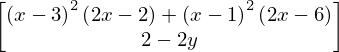

 1 pour afficher les gradients, 
 2 la hessienne, 
 3 les hessiennes évaluées aux points critiques, 
 4 pour sortir
Entrez le numéro : 2


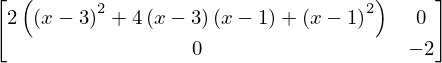

 1 pour afficher les gradients, 
 2 la hessienne, 
 3 les hessiennes évaluées aux points critiques, 
 4 pour sortir
Entrez le numéro : 3


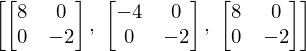

 1 pour afficher les gradients, 
 2 la hessienne, 
 3 les hessiennes évaluées aux points critiques, 
 4 pour sortir
Entrez le numéro : 

 Not Valid Choice Try again


In [6]:
def Reponse_Question_1(f):
    gradf,H, Liste_pc, Hessienne_evaluee_aux_pc=Hessiennes(f)
    print("Les points critiques de f et leur nature sont : ")
    display(PC_et_nature(f))
    ans=True
    while ans:
        print(" 1 pour afficher les gradients, \n 2 la hessienne, \n 3 les hessiennes évaluées aux points critiques, \n 4 pour sortir",)
        ans=input("Entrez le numéro : ")
        if ans=="1":
            display(gradf)
        elif ans=="2":
            display(H)
        elif ans=="3":
            display(Hessienne_evaluee_aux_pc)
        elif ans=="4":
            print("\n Goodbye") 
            ans = None
        else:
            print("\n Not Valid Choice Try again")
Reponse_Question_1(f)

In [7]:
##Graphiques des solutions des gradients
from IPython.display import Image


In [8]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display 
from ipywidgets import interactive
import ipywidgets
plt.rc('figure',figsize=(9,9))

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML

In [10]:
from matplotlib import cm
def Courbe_Niv_Graph_3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    x=np.linspace(0,4, 100)
    y=np.linspace(0, 4, 100)
    xx, yy = np.meshgrid(x,y)
    zz=(xx-3)**2*(xx-1)**2-(yy-1)**2
    ax.plot_surface(xx,yy,zz, rstride=8, cstride=8, alpha=0.4)

    # Plot projections of the contours for each dimension.  By choosing offsets
    # that match the appropriate axes limits, the projected contours will sit on
    # the 'walls' of the graph
    cset = ax.contour(xx, yy, zz,20, zdir='z', offset=-9, cmap=cm.coolwarm)
    cset = ax.contour(xx, yy,zz,20, zdir='x', offset=-1, cmap=cm.coolwarm)
    cset = ax.contour(xx, yy, zz,20, zdir='y', offset=5, cmap=cm.coolwarm)
    
    ax.set_title("Représentation 3D et projection des courbes de niveau de $f$")
    
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_zlim(-9, 9)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

In [11]:
def F(x,y):
    return (x-3)**2*(x-1)**2-(y-1)**2
##La figure
def Courbes():
    ##génération des courbes de niveaux
    fig,ax1=plt.subplots(1,1)
    x=np.linspace(0,4, 200)
    y=np.linspace(0,4, 200)
    xx, yy = np.meshgrid(x,y)
    zz=F(xx,yy)
    level_set=ax1.contour(xx, yy, zz , np.arange(zz.min(), zz.max(), 0.5), cmap=cm.coolwarm)
    ax1.clabel(level_set, inline=1, fontsize=8)
    
    ax1.set_title('Courbes de niveau et nature des points critiques')
    
    ax1.set_xlim([0,4])
    ax1.set_ylim([0,4])
    
    ax1.annotate('Point selle', xy=(1,1), xytext=(1,1.5),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    ax1.annotate('Max local', xy=(2,1), xytext=(2,1.5),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    ax1.annotate('Point selle', xy=(3,1), xytext=(3,1.5),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    plt.show()

 
 1 la projection des courbes de niveaux sur les différents axes, 
 2 courbes de niveaux et points critiques, 
 3 pour sortir
Entrez le numéro : 1


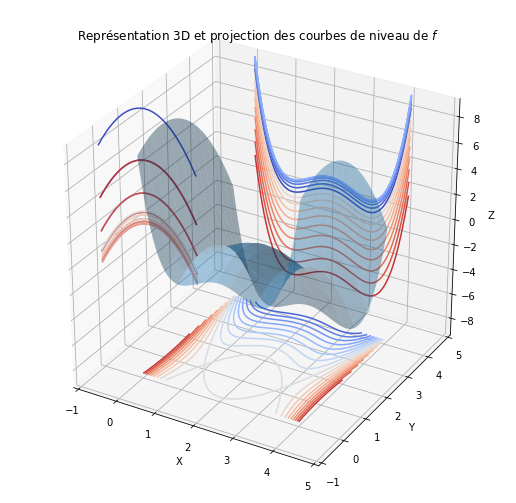

 
 1 la projection des courbes de niveaux sur les différents axes, 
 2 courbes de niveaux et points critiques, 
 3 pour sortir
Entrez le numéro : 

 Not Valid Choice Try again


In [12]:
def Graphiques_Question_1():
    ans=True
    while ans:
        print(" \n 1 la projection des courbes de niveaux sur les différents axes, \n 2 courbes de niveaux et points critiques, \n 3 pour sortir",)
        ans=input("Entrez le numéro : ")
        if ans=="1":
            Courbe_Niv_Graph_3d()
        elif ans=="2":
            Courbes()
        elif ans=="3":
            print("\n Goodbye") 
            ans = None
        else:
            print("\n Not Valid Choice Try again")
Graphiques_Question_1()##Temps de chargement de l'animation est long et nécessite l'installation de ffmeg

## Question 2 : Déterminer le maximum de $f$ dans $\mathcal{D}_R \cap \left(\mathbb{R}_+\times \mathbb{R}_+\right)$. en fonction du paramètre $R>0$.

On va commencer par définir la contrainte, vérifier que la condition de qualification des contraintes et créer une fonction permettant de calculer le Lagrangien. Il ne faut pas oublier les cas particulier x = 0 et y=0

In [13]:
def contrainte(R):##On définit la contrainte en empêchant toute valeur de R<0
    c=(x-1)**2+(y-1)**2-R**2  
    if R<0:
        return none
    return c

def CQND(R):##Liste des gradients de la contrainte
    Y=f.free_symbols
    gradientsc1 = []
    for var1 in Y:
        c1 = contrainte(R)
        gradientsc1.append(c1.diff(var1))
    Liste_Gradients_de_la_contrainte=sym.Matrix([gradientsc1])
    return Liste_Gradients_de_la_contrainte


def lagrangien(f,R): #Calcul du lagrangien et Points critiques
    Y=f.free_symbols
    c=contrainte(R)
    Lagrangien = f - (lam * c)##on multiplie
    X = Lagrangien.free_symbols
    liste_gradients = []##liste des gradients avec la contrainte
    for var1 in Y:
        liste_gradients.append(Lagrangien.diff(var1))
    liste_gradients.append(lam*Lagrangien.diff(lam))
    gradL = sym.Matrix(liste_gradients)
    if R>1:
        PC_sur_contrainte=[{lam:12,x:0,y:1},{lam:-1,x:1,y:0}]
        PC = sym.solve(gradL,X)+PC_sur_contrainte
    else:
        PC=sym.solve(gradL,X)
    return Lagrangien, PC


On va ensuite vérifier que nos points critiques sont bien définis dans notre contrainte.

In [14]:
def admissibilite(f,R):##on vérifie que nos points critiques sont admissibles
    Y=f.free_symbols
    Lagrangien,PC = lagrangien(f,R)
    contrainte_0 = contrainte(0)
    admi = []
    PC_admissible= []
    for pc in PC: 
        admi.append(contrainte_0.subs(pc))
    for i in range(len(admi)):
        if admi[i] <=(R**2) and PC[i][x]>=0 and PC[i][y]>=0  :##on vérifie qu'on est dans ou sur le cercle 
            ##et que les points critiques trouvés sont définis sur R+xR+
            PC_admissible.append(PC[i])
    return PC_admissible

Une fois la vérification effectuée nous calculerons la hessienne bordée.

In [15]:
def Hessienne_Lagrangien(f,R):    
    Liste_Gradients_de_la_contrainte=np.matrix(CQND(R))
    Nombre_de_contraintes= len(Liste_Gradients_de_la_contrainte)
    L, PC = lagrangien(f,R)
    Y=f.free_symbols
    liste_gradients=[]##liste du gradient initial
    liste_Hessiennes=[]##liste de la hessienne initiale
    ##Boucle sur la premiere variable##
    for var1 in list(Y):
        liste_gradients.append(L.diff(var1))
        Hx=[]
        ##calcul de la hessienne##
        for var2 in list(Y):
            Hx.append(L.diff(var1,var2))
        liste_Hessiennes.append(Hx)
    C = np.concatenate((Liste_Gradients_de_la_contrainte.T,liste_Hessiennes), axis = 1)##on concatene la hessienne avec la contrainte 
    ##pour retrouver la hessienne bordée
    D = np.concatenate((np.zeros((Nombre_de_contraintes,Nombre_de_contraintes),dtype=int), Liste_Gradients_de_la_contrainte), axis = 1)
    Hlagrangien = np.concatenate((D,C), axis = 0)
    return sym.Matrix(Hlagrangien), Nombre_de_contraintes

On remplace les termes pour avoir les hessiennes bordées évaluées aux points critiques (saturée) ainsi que les hessiennes évluées aux points critiques (non saturée).

In [16]:
def CS2(f,R):
    gradf,H, Liste_pc, Hessienne_evaluee_aux_pc = Hessiennes(f)
    PC_admissible = admissibilite(f,R)
    Hlagrangien, Nombre_de_contraintes=Hessienne_Lagrangien(f,R)##on rappelle localement nos fonctions
    PC_contrainte_pas_sature = []
    PC_contrainte_sature =[] 
    Hessienne_évaluée_aux_PC = []
    Hessienne_saturée_évaluée_aux_PC= []
    for i in range(len(PC_admissible)):
        if PC_admissible[i][lam]==0:##si lambda =0 alors la contrainte n'est pas saturée
            PC_contrainte_pas_sature.append(PC_admissible[i])
        else:
            PC_contrainte_sature.append(PC_admissible[i]) 
            
    for pc in PC_contrainte_pas_sature:
        Hessienne_évaluée_aux_PC.append(H.subs(pc))
        
    for pc in PC_contrainte_sature:
        Hessienne_saturée_évaluée_aux_PC.append(sym.Matrix(Hlagrangien).subs(pc))
        
    return Hessienne_évaluée_aux_PC,Hessienne_saturée_évaluée_aux_PC , PC_contrainte_pas_sature, PC_contrainte_sature 

In [17]:
def MineursH(A,f,R):##Les calculs de mineurs
    Hlagrangien, Nombre_de_contraintes=Hessienne_Lagrangien(f,R)
    n = len(np.matrix(Hlagrangien))##taille de la matrice bordée
    mineurs=[]
    for k in range(Nombre_de_contraintes+1,n+1):
        Ak=A[0:k,0:k]
        mineurs.append(sym.det(Ak))
    return mineurs, Nombre_de_contraintes

def NatureBorde(A,f,R):##fonction qui détermine la nature des points critiques pour ceux qui sont sur le bord de la contrainte
    mineurs, Nombre_de_contraintes  = MineursH(A,f,R)
    x = len(mineurs)
    Lnew = [(((-1)**(i+1))*mineurs[i]) for i in range(x)]
    Lnew2 = [(((-1)**(Nombre_de_contraintes))*mineurs[i]) for i in range(x)]
    if np.all(np.array(Lnew2)>0):
        texte = "Le point critique est un minimum local"
        return texte
    elif np.all(np.array(Lnew)>0):
        texte = "Le point critique est un maximum local"
        return texte
    elif np.all(np.array(mineurs)!=0):
        texte = "Le point critique est un point selle "
        return texte
    else :
        texte = "On ne conclue pas"
        return  texte

In [18]:
def Nature_des_points_critiques_sous_la_contrainte(f,R):
    Hessienne_évaluée_aux_PC,Hessienne_saturée_évaluée_aux_PC, PC_contrainte_pas_sature, PC_contrainte_sature = CS2(f,R)
    Liste=[]
    for H in Hessienne_évaluée_aux_PC:
        Liste.append(Nature(H))
    for H in Hessienne_saturée_évaluée_aux_PC:
        Liste.append(NatureBorde(H,f,R))
    PC = PC_contrainte_pas_sature + PC_contrainte_sature
    return PC, Liste

In [19]:
def MaxGlobal(f,R):##on a décidé de remplacer les points critiques dans la fonction pour déterminer 
    ##les max globaux sous la contrainte et de créer uneboucle pour les comparer.
    Hessienne_évaluée_aux_PC,Hessienne_saturée_évaluée_aux_PC, PC_contrainte_pas_sature, PC_contrainte_sature = CS2(f,R)
    PC = PC_contrainte_pas_sature + PC_contrainte_sature
    Liste_des_resultats = []
    for pc in PC:
        Liste_des_resultats.append(f.subs(pc))
    L_R=np.array(Liste_des_resultats)
    n=len(Liste_des_resultats)
    for i in range(n):
        if L_R[i] >= np.all(L_R):
            texte = "Le point est un max global"
            PCCmax=PC[i]
    return Liste_des_resultats,texte,PCCmax

Le maximum global sous la contrainte de f est : 


([0, 1, -1, -1, 9], 'Le point est un max global', {lambda: 12, x: 0, y: 1})

 1 pour afficher le lagrangien,
 2 pour les points critiques admissibles, 
 3 pour la hessienne bordée, 
 4 pour la CS2, 
 5 pour la nature des points critiques, 
 6 pour sortir
Entrez le numéro : 1


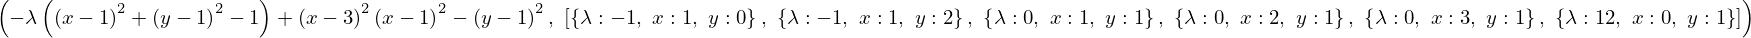

 1 pour afficher le lagrangien,
 2 pour les points critiques admissibles, 
 3 pour la hessienne bordée, 
 4 pour la CS2, 
 5 pour la nature des points critiques, 
 6 pour sortir
Entrez le numéro : 2


 1 pour afficher le lagrangien,
 2 pour les points critiques admissibles, 
 3 pour la hessienne bordée, 
 4 pour la CS2, 
 5 pour la nature des points critiques, 
 6 pour sortir
Entrez le numéro : 3


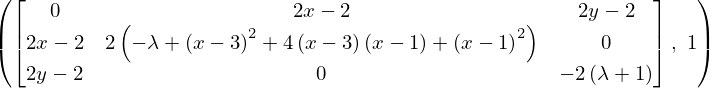

 1 pour afficher le lagrangien,
 2 pour les points critiques admissibles, 
 3 pour la hessienne bordée, 
 4 pour la CS2, 
 5 pour la nature des points critiques, 
 6 pour sortir
Entrez le numéro : 4


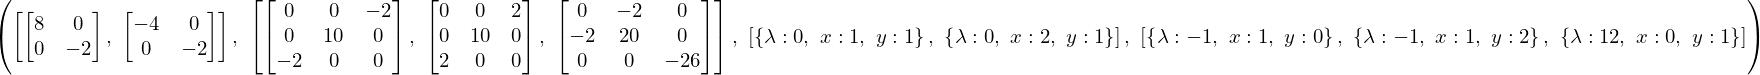

 1 pour afficher le lagrangien,
 2 pour les points critiques admissibles, 
 3 pour la hessienne bordée, 
 4 pour la CS2, 
 5 pour la nature des points critiques, 
 6 pour sortir
Entrez le numéro : 

 Not Valid Choice Try again


In [20]:
def Reponse_Question_2(f,R):##Menu réponse question deux
    print("Le maximum global sous la contrainte de f est : ")
    display(MaxGlobal(f,R))
    ans=True
    while ans:
        print(" 1 pour afficher le lagrangien,\n 2 pour les points critiques admissibles, \n 3 pour la hessienne bordée, \n 4 pour la CS2, \n 5 pour la nature des points critiques, \n 6 pour sortir",)
        ans=input("Entrez le numéro : ")
        if ans=="1":
            display(lagrangien(f,R))
        elif ans=="2":
            display(admissibilite(f,R))
        elif ans=="3":
            display(Hessienne_Lagrangien(f,R))
        elif ans=="4":
            display(CS2(f,R))
        elif ans=="5":
            display(Nature_des_points_critiques_sous_la_contrainte(f,R))
        elif ans=="6":
            print("\n Goodbye") 
            ans = None
        else:
            print("\n Not Valid Choice Try again")
            
Reponse_Question_2(f,1)

In [21]:
def F(x,y):
    return (x-3)**2*(x-1)**2-(y-1)**2
##La figure
def visu(r=1):
    assert r>0
    t=np.linspace(0,np.pi*2,101)
    ##génération des courbes de niveaux
    fig,ax1=plt.subplots(1,1)
    x=np.linspace(0,1+r, 200)
    y=np.linspace(0,1+r, 200)
    xx, yy = np.meshgrid(x,y)
    zz=F(xx,yy)
    level_set=ax1.contour(xx, yy, zz , np.arange(zz.min(), zz.max(), r-(1/2)*r), cmap=cm.coolwarm)
    ##contrainte cercle
    ax1.plot(1+r*np.cos(t),1+r*np.sin(t),'k--')
    ##annotations
    ##Limite ds axes
    ax1.set_xlim([0,r+1])
    ax1.set_ylim([0,r+1])
    if r>=1:
        ax1.annotate('Max local', xy=(2,1), xytext=(2,1+r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
        
    if r>2:
        ax1.annotate('Point selle', xy=(3,1), xytext=(3,1+r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
        
    if r>=3:
        ax1.annotate('Max Global', xy=(1+r,1), xytext=(1+r,1+r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    elif r>1 and r<2:
        ax1.annotate('Min local', xy=(1+r,1), xytext=(1+r,1+r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    else:
        ax1.annotate('Max local', xy=(1+r,1), xytext=(1.5+r,1+r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
        
    if r>=1and r<=3:
        ax1.annotate('Max Global', xy=(0,1), xytext=(0.5,1),va="center", ha="center",
                      bbox=dict(boxstyle="round", fc="w"),
                      arrowprops=dict(arrowstyle="->"))
    elif r<1 and r>0:
        ax1.annotate('Max Global', xy=(1-r,1), xytext=(r/4,1),va="center", ha="center",
                      bbox=dict(boxstyle="round", fc="w"),
                      arrowprops=dict(arrowstyle="->"))
        
    else:
        ax1.annotate('Max local', xy=(0,1), xytext=(0.5,1),va="center", ha="center",
                      bbox=dict(boxstyle="round", fc="w"),
                      arrowprops=dict(arrowstyle="->"))
    if r>1:    
        ax1.annotate('Min global', xy=(1,1+r), xytext=(1,1+r*3/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    else:
        ax1.annotate('Min local', xy=(1,1+r), xytext=(1,1+r*3/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    ax1.annotate('Min local', xy=(1,1-r), xytext=(1,-r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    if r>1:
        ax1.annotate('Min local', xy=(1,0), xytext=(1,-r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    ax1.annotate('Point selle', xy=(1,1), xytext=(1,1+r/4),va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))

In [22]:
##les widgets
rwid=ipywidgets.FloatSlider(
    value=1.,
    min=0.1, 
    max=5.10, 
    step=0.1,
    useblit=True,
    description=r'$R$:',
    orientation='horizontal')
ui = ipywidgets.HBox([rwid])
out=ipywidgets.interactive_output(visu, {'r':rwid
                                        })
display(ui,out)

Output()